In [121]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import socket
from urllib3.connection import HTTPConnection
import nltk    #NLTK for description preprocessing
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from lxml import html

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
HTTPConnection.default_socket_options = (
    HTTPConnection.default_socket_options + [
        (socket.SOL_SOCKET, socket.SO_KEEPALIVE, 1),
        (socket.SOL_TCP, socket.TCP_KEEPIDLE, 45),
        (socket.SOL_TCP, socket.TCP_KEEPINTVL, 10),
        (socket.SOL_TCP, socket.TCP_KEEPCNT, 6)
    ] )

In [123]:
list= ['the-presidency/presidential-speeches/august-28-2008-acceptance-speech-democratic-national',
'the-presidency/presidential-speeches/november-4-2008-remarks-election-night',
'the-presidency/presidential-speeches/january-20-2009-inaugural-address',
'the-presidency/presidential-speeches/january-29-2009-remarks-lilly-ledbetter-fair-pay-restoration',
'the-presidency/presidential-speeches/february-7-2009-remarks-american-recovery-and-reinvestment-act',
'the-presidency/presidential-speeches/february-24-2009-address-joint-session-congress',
'the-presidency/presidential-speeches/may-26-2009-remarks-nominating-judge-sonia-sotomayor-us',
'the-presidency/presidential-speeches/june-4-2009-address-cairo-university',
'the-presidency/presidential-speeches/september-9-2009-address-congress-health-care',
'the-presidency/presidential-speeches/december-1-2009-speech-strategy-afghanistan-and-pakistan',
'the-presidency/presidential-speeches/december-10-2009-acceptance-nobel-peace-prize',
'the-presidency/presidential-speeches/january-27-2010-2010-state-union-address',
'the-presidency/presidential-speeches/february-9-2010-news-conference-congressional-gridlock',
'the-presidency/presidential-speeches/march-15-2010-speech-health-care-reform',
'the-presidency/presidential-speeches/april-15-2010-remarks-space-exploration-21st-century',
'the-presidency/presidential-speeches/april-28-2010-remarks-wall-street-reform',
'the-presidency/presidential-speeches/june-15-2010-speech-bp-oil-spill',
'the-presidency/presidential-speeches/august-31-2010-address-end-combat-mission-iraq',
'the-presidency/presidential-speeches/september-23-2010-address-united-nations',
'the-presidency/presidential-speeches/november-3-2010-press-conference-after-2010-midterm-elections',
'the-presidency/presidential-speeches/january-12-2011-remarks-memorial-victims-tucson-az-shooting',
'the-presidency/presidential-speeches/january-25-2011-2011-state-union-address',
'the-presidency/presidential-speeches/may-1-2011-remarks-death-osama-bin-laden',
'the-presidency/presidential-speeches/may-19-2011-speech-american-diplomacy-middle-east-and-north',
'the-presidency/presidential-speeches/may-25-2011-address-british-parliament',
'the-presidency/presidential-speeches/june-22-2011-remarks-afghanistan-pullout',
'the-presidency/presidential-speeches/september-8-2011-address-congress-american-jobs-act',
'the-presidency/presidential-speeches/october-21-2011-remarks-end-war-iraq',
'the-presidency/presidential-speeches/january-24-2012-2012-state-union-address',
'the-presidency/presidential-speeches/september-6-2012-nominee-acceptance-speech-2012-democratic',
'the-presidency/presidential-speeches/november-6-2012-2012-election-night-victory-speech',
'the-presidency/presidential-speeches/december-16-2012-remarks-sandy-hook-elementary-shootings',
'the-presidency/presidential-speeches/january-21-2013-second-inaugural-address',
'the-presidency/presidential-speeches/january-29-2013-remarks-immigration-reform',
'the-presidency/presidential-speeches/february-13-2013-2013-state-union-address',
'the-presidency/presidential-speeches/march-1-2013-statement-government-sequester',
'the-presidency/presidential-speeches/march-21-2013-address-people-israel',
'the-presidency/presidential-speeches/april-8-2013-speech-gun-violence',
'the-presidency/presidential-speeches/july-19-2013-remarks-trayvon-martin',
'the-presidency/presidential-speeches/july-24-2013-remarks-education-and-economy',
'the-presidency/presidential-speeches/september-10-2013-address-nation-syria',
'the-presidency/presidential-speeches/december-4-2013-speech-economic-mobility',
'the-presidency/presidential-speeches/january-28-2014-2014-state-union-address',
'the-presidency/presidential-speeches/november-20-2014-address-nation-immigration',
'the-presidency/presidential-speeches/january-20-2015-2015-state-union-address',
'the-presidency/presidential-speeches/march-7-2015-remarks-50th-anniversary-selma-marches',
'the-presidency/presidential-speeches/june-26-2015-remarks-eulogy-honorable-reverend-clementa',
'the-presidency/presidential-speeches/january-12-2016-2016-state-union-address',
'the-presidency/presidential-speeches/march-22-2016-remarks-people-cuba',
'the-presidency/presidential-speeches/may-15-2016-commencement-address-rutgers-university',

]

link ='https://millercenter.org/'

s = HTMLSession()

titulo=[]
discurso=[]
for i in list:
    link_completo=link+str(i)

    r=s.get(link_completo)
    soup=BeautifulSoup(r.text,'html.parser')

    title = soup.find('h2',class_='presidential-speeches--title').span.text
    print(title)
    titulo.append(title)


    full_discurso = soup.find('div',class_= 'view-transcript')
    
    total = full_discurso.find_all('p')

    total = [elem.get_text() for elem in total]

    #taking out the list of list

    discurso.append(total)

    

    

    

August 28, 2008: Acceptance Speech at the Democratic National Convention
November 4, 2008: Remarks on Election Night
January 20, 2009: Inaugural Address
January 29, 2009: Remarks on the Lilly Ledbetter Fair Pay Restoration Act Bill Signing
February 7, 2009: Remarks on the American Recovery and Reinvestment Act
February 24, 2009: Address Before a Joint Session of Congress
May 26, 2009: Remarks on Nominating Judge Sonia Sotomayor to the U.S. Supreme Court
June 4, 2009: Address at Cairo University
September 9, 2009: Address to Congress on Health Care
December 1, 2009: Speech on Strategy in Afghanistan and Pakistan
December 10, 2009: Acceptance of Nobel Peace Prize
January 27, 2010: 2010 State of the Union Address
February 9, 2010: News Conference on Congressional Gridlock
March 15, 2010: Speech on Health Care Reform
April 15, 2010: Remarks on Space Exploration in the 21st Century
April 28, 2010: Remarks on Wall Street Reform
June 15, 2010: Speech on the BP Oil Spill
August 31, 2010: Addre

In [124]:
res = [''.join(ele) for ele in discurso]

len(res)

50

In [125]:
fecha = [i.split(':')[0] for i in titulo]

discursos_titulo = [i.split(':')[1] for i in titulo]

In [126]:
df = pd.DataFrame({'titulo':discursos_titulo,'fecha':fecha,'discurso':res})

In [127]:
df['discurso'] = df['discurso'].astype(str).str.lower()

In [128]:
regexp = RegexpTokenizer('\w+') #tokenization with regular expression

df['discurso_tokenizado']=df['discurso'].apply(regexp.tokenize)

In [129]:
stopwords = nltk.corpus.stopwords.words('english')

new_stopwords = ['one','two','not','last','long','four','five','six','make','much','time','ago','want','thank','even','never','seen','greatest','applause','bless','every','tight','going','said','knit',
'every','tight','going','said','knit','lot','little','know','say','thing','many','actually','think','look','things','happen','talking','take',
'saying','lose','came','still']

stopwords.extend(new_stopwords)

In [130]:
df['discurso_tokenizado'] = df['discurso_tokenizado'].apply(lambda x: [item for item in x if item not in stopwords]) 

df['text_string'] = df['discurso_tokenizado'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [131]:
all_words = ' '.join([word for word in df['text_string']])

all_words = re.sub(r'\b(\w+\s*)\1{1,}', '\\1', all_words)

In [132]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

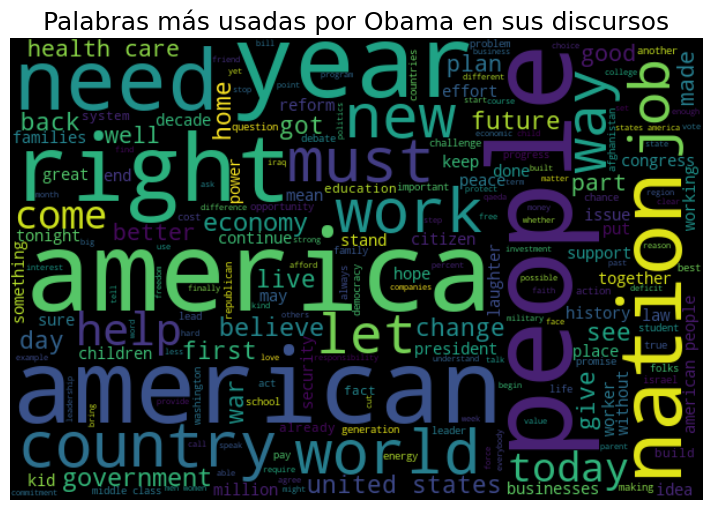

In [133]:
from wordcloud import WordCloud #Wordclud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                    background_color='black',
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 6))
plt.title("Palabras más usadas por Obama en sus discursos",fontsize= 18)
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.savefig('wordcloudObama.jpg', bbox_inches='tight')
plt.show();

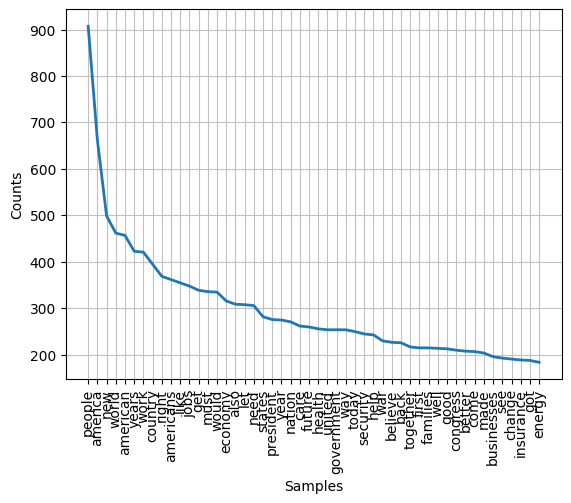

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [134]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
fdist.plot(50)

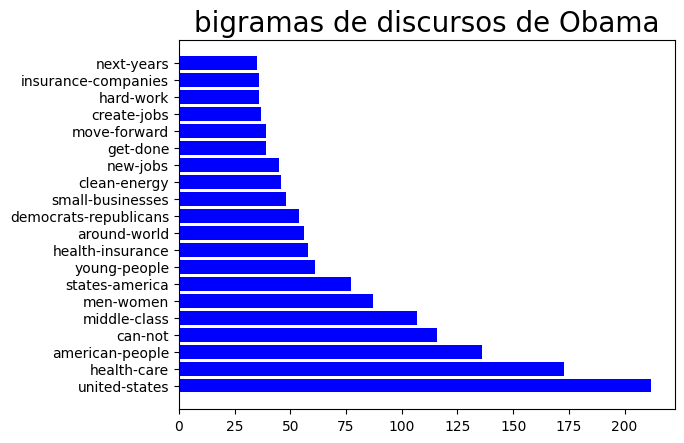

In [135]:
from nltk.util import ngrams

bigrams=ngrams(tokenized_words,2)

tokenized_bg = nltk.FreqDist(bigrams)

plot =tokenized_bg.most_common(20)

wrds = ['-'.join(x) for x, c in plot]

wdth = [c for x, c in plot]

plt.title('bigramas de discursos de Obama',fontsize=20)

plt.barh(wrds, wdth, color='blue')

plt.savefig('bigrams_obama.jpg',bbox_inches='tight')
plt.show()

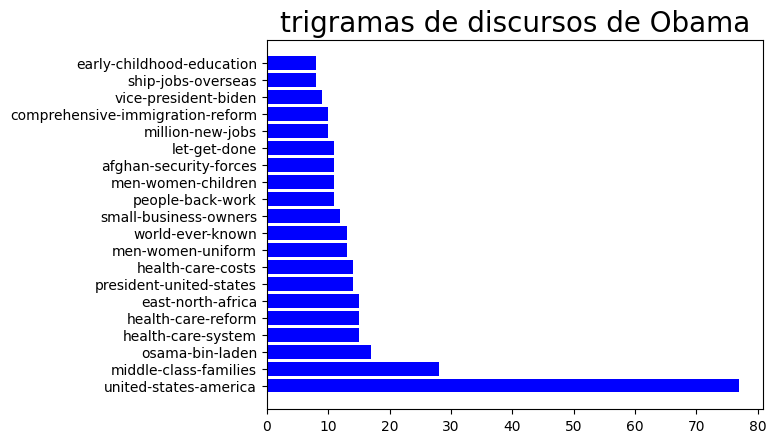

In [136]:
trigrams=ngrams(tokenized_words,3)

tokenized_tri = nltk.FreqDist(trigrams)

plot =tokenized_tri.most_common(26)
plot.remove((('god', 'may', 'god'), 11))
plot.remove((('may', 'god', 'united'), 12))
plot.remove((('cost', 'health', 'care'), 13))
plot.remove((('middle', 'east', 'north'), 15))
plot.remove((('speaker', 'vice', 'president'), 10))
plot.remove((('god', 'united', 'states'), 27))


wrds = ['-'.join(x) for x, c in plot]

wdth = [c for x, c in plot]

plt.title('trigramas de discursos de Obama',fontsize=20)

plt.barh(wrds, wdth, color='blue')

plt.savefig('trigramas_obama.jpg',bbox_inches='tight')
plt.show()

In [137]:
plot

[(('united', 'states', 'america'), 77),
 (('middle', 'class', 'families'), 28),
 (('osama', 'bin', 'laden'), 17),
 (('health', 'care', 'system'), 15),
 (('health', 'care', 'reform'), 15),
 (('east', 'north', 'africa'), 15),
 (('president', 'united', 'states'), 14),
 (('health', 'care', 'costs'), 14),
 (('men', 'women', 'uniform'), 13),
 (('world', 'ever', 'known'), 13),
 (('small', 'business', 'owners'), 12),
 (('people', 'back', 'work'), 11),
 (('men', 'women', 'children'), 11),
 (('afghan', 'security', 'forces'), 11),
 (('let', 'get', 'done'), 11),
 (('million', 'new', 'jobs'), 10),
 (('comprehensive', 'immigration', 'reform'), 10),
 (('vice', 'president', 'biden'), 9),
 (('ship', 'jobs', 'overseas'), 8),
 (('early', 'childhood', 'education'), 8)]